## Detect Outlier

### Percentile
    
Percentile = (number of people behind you/total number of people excluding you) x 100

For example, if in a class of 100 students, you topped the exam. So what this means is that your score is better than everyone and hence your percentile is 100%ile. Again, if your rank had been 30th, that means your score is better than 70 people and hence your percentile is 70%ile.

Thus in percentile, the number of people whose score is below you or the number of people your score is better than is your percentile.

In [34]:
import numpy as np
exam_score = [95,76,12,36,88,67,44,90,36,85,76,24,23,23]
np.percentile(exam_score,100)

95.0

### Outlier 
###### An outlier is an observation that lies an abnormal distance from other values in a random sample from a population - it's like odd one out

#### Types of Outlier

1. Global Outliers (Point Anomalies) - A data point is considered a global outlier if its value is far outside the entirety of the data set in which it is found.

2. Contextual Outliers (aka Conditional Anomalies) - A data point is considered a contextual outlier if its value significantly deviates from the rest of the data points in the same context. Note that this means that same value may not be considered an outlier if it occurred in a different context. If we limit our discussion to time series data, the “context” is almost always temporal, because time series data are records of a specific quantity over time. It’s no surprise then that contextual outliers are common in time series data.

3. Collective Outliers - A subset of data points within a data set is considered anomalous if those values as a collection deviate significantly from the entire data set, but the values of the individual data points are not themselves anomalous in either a contextual or global sense. In time series data, one way this can manifest is as normal peaks and valleys occurring outside of a time frame when that seasonal sequence is normal or as a combination of time series that is in an outlier state as a group.

A plane landing on a highway is a global outlier because it’s a truly rare event that a plane would have to land there. If the highway was congested with traffic that would be a contextual outlier if it was happening at 3 a.m. when traffic doesn’t usually start until later in the morning when people are heading to work. And if every car on the freeway was moving to the left lane at the same time that would be a collective outlier because although it’s definitely not rare that people move to the left lane, it is unusual that all cars would relocate at the same exact time.

A banking customer who normally deposits no more than USD 1000 a month in checks at a local ATM suddenly makes two cash deposits of $5000 each in the span of two weeks is a global anomaly because this event has never before occurred in this customer’s history. The time series data of their weekly deposits would show an abrupt recent spike. Such a drastic change would raise alarms as these large deposits could imply illicit commerce or money laundering.

A sudden surge in order volume at an eCommerce company, as seen in that company’s hourly total orders for example, could be a contextual outlier if this high volume occurs outside of a known promotional discount or high volume period like Black Friday. Could this stampede be due to a pricing glitch which is allowing customers to pay pennies on the dollar for a product?

A publicly traded company’s stock is never a static thing, even when prices are relatively stable and there isn’t an overall trend, and there are minute fluctuations over time. If the stock price remained at exactly the same price (to the penny) for an extended period of time, then that would be a collective outlier. In fact, this very thing occurred to not one, but several tech companies on July 3 of this year on the Nasdaq exchange when the stock prices for several companies – including tech giants Apple and Microsoft – were listed as $123.45.

Source: https://www.anodot.com/blog/quick-guide-different-types-outliers/

#### Why outlier happens ?

    Data entry errors (human errors)
    Measurement errors (instrument errors)
    Experimental errors (data extraction or experiment planning/executing errors)
    Intentional (dummy outliers made to test detection methods)
    Data processing errors (data manipulation or data set unintended mutations)
    Sampling errors (extracting or mixing data from wrong or various sources)
    Natural (not an error, novelties in data)

#### How to detect Outlier?

    1. Visualization Technique (Box Plot, Scatter Plot, Histogram)
    2. Statistical Technique (Z-Score, IQR )

##### Z-Score pros:
    It is a very effective method if you can describe the values in the feature space with a gaussian distribution. (Parametric)
    The implementation is very easy using pandas and scipy.stats libraries.
##### Z-Score cons:
    It is only convenient to use in a low dimensional feature space, in a small to medium sized dataset.
    Is not recommended when distributions can not be assumed to be parametric.

Recommending to work through a stepped process from extreme value analysis, proximity methods and projection methods.

#### Extreme Value Analysis
You do not need to know advanced statistical methods to look for, analyze and filter out outliers from your data. Start out simple with extreme value analysis.

    Focus on univariate methods
    Visualize the data using scatterplots, histograms and box and whisker plots and look for extreme values
    Assume a distribution (Gaussian) and look for values more than 2 or 3 standard deviations from the mean or 1.5 times from the first or third quartile
    Filter out outliers candidate from training dataset and assess your models performance

#### Proximity Methods
Once you have explore simpler extreme value methods, consider moving onto proximity-based methods.

    Use clustering methods to identify the natural clusters in the data (such as the k-means algorithm)
    Identify and mark the cluster centroids
    Identify data instances that are a fixed distance or percentage distance from cluster centroids
    Filter out outliers candidate from training dataset and assess your models performance

#### Projection Methods
Projection methods are relatively simple to apply and quickly highlight extraneous values.

    Use projection methods to summarize your data to two dimensions (such as PCA, SOM or Sammon’s mapping)
    Visualize the mapping and identify outliers by hand
    Use proximity measures from projected values or codebook vectors to identify outliers
    Filter out outliers candidate from training dataset and assess your models performance

#### Methods Robust to Outliers
An alternative strategy is to move to models that are robust to outliers. There are robust forms of regression that minimize the median least square errors rather than mean (so-called robust regression), but are more computationally intensive. There are also methods like decision trees that are robust to outliers.

You could spot check some methods that are robust to outliers. If there are significant model accuracy benefits then there may be an opportunity to model and filter out outliers from your training data.

### Standard Deviation Method
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

    1 Standard Deviation from the Mean: 68%
    2 Standard Deviations from the Mean: 95%
    3 Standard Deviations from the Mean: 99.7%


Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

Source: https://machinelearningmastery.com/

### Which Machine Learning models are sensitive to Outliers

1. Naive Bayes Classifier - Not Sensitive
2. SVM                    - Not Sensitive
3. Linear Regression      - Sensitive
4. Logistic Regression    - Sensitive
5. Decision Tree Regressor or Classifier - Not Sensitive
6. Ensemble (Random Forest, XGBoost, GradientBoost) - Not Sensitive
7. KNN (K Nearest Neighbors) - Not Sensitive
8. K Means Clustering        - Sensitive
9. Hierarchical Clustering   - Sensitive
10. PCA                      - Sensitive
11. Neural Networks          - Sensitive

# Lets deep dive into Outlier detection with python 

Data Source : https://www.kaggle.com/nikkisharma536/house-prediction-dealing-with-outlier/

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\EBS\\0. Python\\Data Science with Python\\Detect and Handle Outlier\\house_price_prediction_dataset\\train.csv",sep=",")

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\DasAm\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

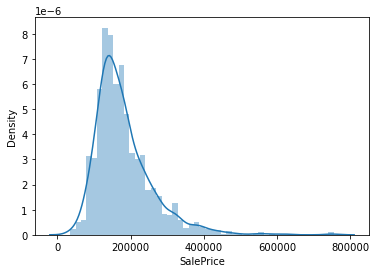

In [43]:
# Plot Histogram 
sns.distplot(df['SalePrice'])

# Lookslike data is right skewed (as seen in below plot)

#### Skewness: 
The term ‘skewness’ is used to mean the absence of symmetry from the mean of the dataset. Skewness is used to indicate the shape of the distribution of data.In a skewed distribution, the curve is extended to either left or right side. So, when the plot is extended towards the right side more, it denotes positive skewness. On the other hand, when the plot is stretched more towards the left direction, then it is called as negative skewness.

#### Kurtosis:
In statistics, kurtosis is defined as the parameter of relative sharpness of the peak of the probability distribution curve.It is used to indicate the flatness or peakedness of the frequency distribution curve and measures the tails or outliers of the distribution.Positive kurtosis represents that the distribution is more peaked than the normal distribution, whereas negative kurtosis shows that the distribution is less peaked than the normal distribution.

In [48]:
# Calculate Skewness and Kurtosis
print("Skewness : %f" % df['SalePrice'].skew())
print("Kurtosis : %f" % df['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


Text(0.5, 0, 'Count')

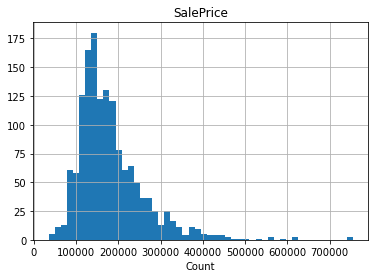

In [54]:
# Histogram plotting using matplotlib
figure = df['SalePrice'].hist(bins=50)
figure.set_title('SalePrice')
figure.set_xlabel('SalePrice')
figure.set_xlabel('Count')

<AxesSubplot:>

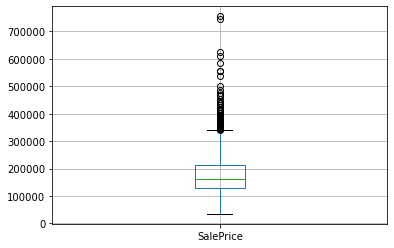

In [61]:
# Visualizing outliers and skewness through Boxplot
df.boxplot(column='SalePrice')

In [62]:
# Statistical measurement against SalePrice data
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [103]:
# Assuming SalePrice is following Gaussian Distribution , We'll identify the outliers by calculating bounderies

upper_boundary = df['SalePrice'].mean()+3*df['SalePrice'].std()
print("Upper Boundary mean + 3 standard deviation : {}".format(upper_boundary))
lower_boundary = df['SalePrice'].mean()-3*df['SalePrice'].std()
print("Lower Boundary mean - 3 standard deviation : {}".format(lower_boundary))

Upper Boundary mean + 3 standard deviation : 419248.70453907084
Lower Boundary mean - 3 standard deviation : -57406.31275824897


In [106]:
# Alternatively, Using IQR to determine upper and Lower bounderies (1.5 Multiplier)

q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

Upper Boundary using IQR  : 340037.5
Lower Boundary using IQR  : 3937.5


In [107]:
# Using IQR to determine upper and Lower bounderies - FOR EXTREME OUTLIER (3 Multiplier)

q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (3 * IQR)
lower_boundary = q1 - (3 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

Upper Boundary using IQR  : 466075.0
Lower Boundary using IQR  : -122100.0
